## Use Monte Carlo simulation with Brownian motion
## to forecast TSLA daily Stock Prices


We assume past movements of stock prices are independent to the future prices (random walk), and stocks always trade at their fair value on exchanges (EMH).

We know that:
><tt> Price Today = Price Yesterday * e^r</tt>

We use Brownian motion to model r, where 
><tt> r = drift + volatility </tt>

$$ Drift = Expected.Daily.Return = \mu - \frac{1}{2} * var= \mu - \frac{1}{2} \sigma^2 $$
$$ volatility = ran. var. = \sigma * Z(Rand(0;1)) $$


In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm

In [5]:
ticker = 'TSLA' 
hist_data = pd.DataFrame()
hist_data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2011-1-1')['Adj Close']
hist_data.head()

,TSLA
Date,
2011-01-03,26.620001
2011-01-04,26.670000
2011-01-05,26.830000
2011-01-06,27.879999
2011-01-07,28.240000


In [6]:
log_returns = np.log(1 + hist_data.pct_change()) 
mu = log_returns.mean()
mu

TSLA    0.001528
dtype: float64

In [7]:
var = log_returns.var()
var

TSLA    0.001128
dtype: float64

In [8]:
stdev = log_returns.std()
stdev

TSLA    0.033584
dtype: float64

In [9]:
drift = mu - (0.5 * var)
drift.values

array([0.00096428])

In [10]:
# Predict stock price in one year (250 trading days)
t_intervals = 250
iterations = 20

In [11]:
# If an event has a x% chance of occuring
# Then the distance betw the mean and the events is norm.ppf(x) std. dev.
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.98832992, 1.03370097, 0.96888632, ..., 0.95729202, 0.98645917,
        1.023045  ],
       [0.96110649, 1.00226356, 1.03345488, ..., 1.04327077, 0.96839229,
        1.04278534],
       [0.94986328, 1.00125872, 1.01403704, ..., 1.03811058, 1.12749028,
        1.00939158],
       ...,
       [1.0564171 , 0.98999571, 1.02146974, ..., 0.97259762, 1.01131264,
        0.9738709 ],
       [0.97026542, 0.96866111, 1.02072764, ..., 0.97401186, 0.99911013,
        1.00935614],
       [1.05788207, 1.08764599, 1.04266637, ..., 0.99309644, 0.96141632,
        1.00294066]])

In [13]:
lst_price = np.zeros_like(daily_returns)
S0 = hist_data.iloc[-1]
lst_price[0] = S0
for t in range(1, t_intervals):
    lst_price[t] = lst_price[t - 1] * daily_returns[t]
lst_price

array([[1001.91497803, 1001.91497803, 1001.91497803, ..., 1001.91497803,
        1001.91497803, 1001.91497803],
       [ 962.94698408, 1004.18287309, 1035.43392283, ..., 1045.2686093 ,
         970.24673569, 1044.78224613],
       [ 914.66798069, 1005.44685595, 1049.96835143, ..., 1085.10439897,
        1093.94376107, 1054.59440399],
       ...,
       [ 901.40336796, 2699.3622744 ,  780.60452131, ..., 2308.54951805,
        1860.9212807 ,  762.75568642],
       [ 874.60051709, 2614.76725716,  796.7846135 , ..., 2248.5546072 ,
        1859.26530919,  769.89213277],
       [ 925.22420124, 2843.94113139,  830.78052373, ..., 2233.03157192,
        1787.52801615,  772.15612098]])

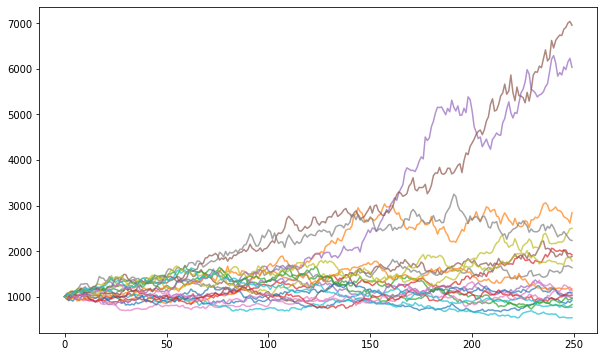

In [15]:
plt.figure(figsize=(10,6))
plt.plot(lst_price, alpha=0.7);